In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load the training and testing datasets 
train_file = 'UNSW_NB15_training.csv'
test_file = 'UNSW_NB15_testing.csv'

# Load the datasets into DataFrames
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [4]:
print("Training Data Sample:")
print(train_df.head())

Training Data Sample:
   id  duration protocol service state  source packets count  \
0   1  0.121478      tcp       -   FIN                     6   
1   2  0.649902      tcp       -   FIN                    14   
2   3  1.623129      tcp       -   FIN                     8   
3   4  1.681642      tcp     ftp   FIN                    12   
4   5  0.449454      tcp       -   FIN                    10   

   destination packet count  source bytes transferred  \
0                         4                       258   
1                        38                       734   
2                        16                       364   
3                        12                       628   
4                         6                       534   

   destination bytes transferred  data transfer rate  ...  ct_dst_sport_ltm  \
0                            172           74.087490  ...                 1   
1                          42014           78.473372  ...                 1   
2            

In [5]:
print("\nTesting Data Sample:")
print(test_df.head())


Testing Data Sample:
   id  duration protocol service state  source packets count  \
0   1  0.000011      udp       -   INT                     2   
1   2  0.000008      udp       -   INT                     2   
2   3  0.000005      udp       -   INT                     2   
3   4  0.000006      udp       -   INT                     2   
4   5  0.000010      udp       -   INT                     2   

   destination packet count  source bytes transferred  \
0                         0                       496   
1                         0                      1762   
2                         0                      1068   
3                         0                       900   
4                         0                      2126   

   destination bytes transferred  data transfer rate  ...  ct_dst_sport_ltm  \
0                              0          90909.0902  ...                 1   
1                              0         125000.0003  ...                 1   
2            

In [6]:
print("the size of training data : ",train_df.shape)
print("the size of testing data : ",test_df.shape)

the size of training data :  (175341, 45)
the size of testing data :  (82332, 45)


In [7]:
train_df.head()

,id,duration,protocol,service,state,source packets count,destination packet count,source bytes transferred,destination bytes transferred,data transfer rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [8]:
print("list of columns in datasete are ",train_df.columns)

list of columns in datasete are  Index(['id', 'duration', 'protocol', 'service', 'state',
       'source packets count', 'destination packet count',
       'source bytes transferred', 'destination bytes transferred',
       'data transfer rate', 'source time to live', 'destination time to live',
       'souce data load ', 'destination data load', 'source packet loss',
       'destination packet loss', 'source inter-packet arrival time',
       'destination inter-packetarrival time', 'jitter from source',
       'jitter from destination', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [9]:
# step 2: checking if data contains any null values 
print("\ncount of null values in training data is: \n",train_df.isna().sum())   # there are no null values so no need to drop any records
print("\ncount of null values in testing data is: \n",test_df.isna().sum())


count of null values in training data is: 
 id                                      0
duration                                0
protocol                                0
service                                 0
state                                   0
source packets count                    0
destination packet count                0
source bytes transferred                0
destination bytes transferred           0
data transfer rate                      0
source time to live                     0
destination time to live                0
souce data load                         0
destination data load                   0
source packet loss                      0
destination packet loss                 0
source inter-packet arrival time        0
destination inter-packetarrival time    0
jitter from source                      0
jitter from destination                 0
swin                                    0
stcpb                                   0
dtcpb                          

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding for categorical columns like 'protocol', 'service', 'state'
train_df['protocol'] = label_encoder.fit_transform(train_df['protocol'])
test_df['protocol'] = label_encoder.transform(test_df['protocol'])

train_df['service'] = label_encoder.fit_transform(train_df['service'])
test_df['service'] = label_encoder.transform(test_df['service'])

all_states = pd.concat([train_df['state'], test_df['state']])

label_encoder = LabelEncoder()
label_encoder.fit(all_states)

train_df['state'] = label_encoder.transform(train_df['state'])
test_df['state'] = label_encoder.transform(test_df['state'])


In [12]:
# step 4: Drop unwanted colmns   
train_df = train_df.drop('id',axis=1)
test_df = test_df.drop('id',axis=1)

In [13]:
print(train_df.head())

   duration  protocol  service  state  source packets count  \
0  0.121478       113        0      4                     6   
1  0.649902       113        0      4                    14   
2  1.623129       113        0      4                     8   
3  1.681642       113        3      4                    12   
4  0.449454       113        0      4                    10   

   destination packet count  source bytes transferred  \
0                         4                       258   
1                        38                       734   
2                        16                       364   
3                        12                       628   
4                         6                       534   

   destination bytes transferred  data transfer rate  source time to live  \
0                            172           74.087490                  252   
1                          42014           78.473372                   62   
2                          13186           14.1

In [14]:
# Filter for specific attack types
attack_types = ['Fuzzers', 'Dos', 'Exploits', 'Generic']
train_df = train_df[train_df['attack_cat'].isin(attack_types)]
test_df = test_df[test_df['attack_cat'].isin(attack_types)]

# Map attack_cat to custom labels
label_map = {
    'Fuzzers': 'Unauthorized Login Attempts',
    'Dos': 'DOS Attacks',
    'Exploits': 'Malware',
    'Generic': 'Data Leaks'
}
train_df['attack_cat'] = train_df['attack_cat'].map(label_map)
test_df['attack_cat'] = test_df['attack_cat'].map(label_map)

In [15]:
train_df

,duration,protocol,service,state,source packets count,destination packet count,source bytes transferred,destination bytes transferred,data transfer rate,source time to live,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
48017,0.675470,113,3,4,12,12,2616,682,34.050365,254,...,1,3,0,0,0,5,3,0,Unauthorized Login Attempts,1
48023,0.758792,113,3,4,12,12,1592,682,30.311338,254,...,1,3,0,0,0,2,2,0,Unauthorized Login Attempts,1
48027,55.968578,113,3,4,28,24,1560,1364,0.911226,254,...,1,3,2,2,0,1,3,0,Unauthorized Login Attempts,1
48033,1.210288,113,3,4,14,12,810,682,20.656240,254,...,1,2,1,1,0,1,2,0,Unauthorized Login Attempts,1
48104,0.232816,113,0,4,10,6,520,268,64.428563,254,...,1,3,0,0,0,3,3,0,Unauthorized Login Attempts,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.000006,119,2,5,2,0,114,0,166666.660800,254,...,17,45,0,0,0,33,45,0,Data Leaks,1
175336,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Data Leaks,1
175338,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Data Leaks,1
175339,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Data Leaks,1


PERFORMING CO-RELATION FOR FEATURES TO OBTAIN TOP 15 FEATURES 

In [16]:
from sklearn.preprocessing import LabelEncoder
le_service = LabelEncoder()
le_state = LabelEncoder()
le_protocol = LabelEncoder()
le_attack = LabelEncoder()

# Encode categorical columns
train_df['service'] = le_service.fit_transform(train_df['service'].astype(str))
train_df['state'] = le_state.fit_transform(train_df['state'].astype(str))
train_df['protocol'] = le_protocol.fit_transform(train_df['protocol'].astype(str))
train_df['attack_cat'] = le_attack.fit_transform(train_df['attack_cat'].astype(str))


# Encode categorical columns
test_df['service'] = le_service.fit_transform(test_df['service'].astype(str))
test_df['state'] = le_state.fit_transform(test_df['state'].astype(str))
test_df['protocol'] = le_protocol.fit_transform(test_df['protocol'].astype(str))
test_df['attack_cat'] = le_attack.fit_transform(test_df['attack_cat'].astype(str))

features = [col for col in train_df.columns if col not in ['id','attack_cat','label']]

# COMPUTING F-SCORES
x = train_df[features]
y = train_df['attack_cat']

from sklearn.feature_selection import f_classif
f_scores,_ = f_classif(x,y)

# Creating DataFrame of features and their F-scores
feature_scores = pd.DataFrame({
    'Feature': features,
    'F-Score': f_scores
}).sort_values(by='F-Score', ascending=False)

# Select top 15 features
top_15_features = feature_scores.head(15)['Feature'].tolist()

# Print results
print("Top 15 Features by Correlation :")
print(feature_scores.head(15))
print("\nSelected Features:", top_15_features)

# Save encoders for use in main code
import pickle
with open('le_service.pkl', 'wb') as f:
    pickle.dump(le_service, f)
with open('le_state.pkl', 'wb') as f:
    pickle.dump(le_state, f)
with open('le_protocol.pkl', 'wb') as f:
    pickle.dump(le_protocol, f)
with open('le_attack.pkl', 'wb') as f:
    pickle.dump(le_attack, f)

Top 15 Features by Correlation :
                     Feature        F-Score
34          ct_dst_sport_ltm  176185.386530
40                ct_srv_dst  119927.159669
30                ct_srv_src  115084.057759
35            ct_dst_src_ltm  111206.135539
33          ct_src_dport_ltm   86049.114652
32                ct_dst_ltm   75955.365697
39                ct_src_ltm   53022.610873
10  destination time to live   29721.887306
22                      dwin   29113.463065
19                      swin   29113.463065
3                      state   24526.028613
23                    tcprtt   20129.711479
9        source time to live   18535.105066
25                    ackdat   18217.697957
24                    synack   17954.232643

Selected Features: ['ct_dst_sport_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_dst_src_ltm', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_src_ltm', 'destination time to live', 'dwin', 'swin', 'state', 'tcprtt', 'source time to live', 'ackdat', 'synack']


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [17]:
train_df

,duration,protocol,service,state,source packets count,destination packet count,source bytes transferred,destination bytes transferred,data transfer rate,source time to live,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
48017,0.675470,17,6,1,12,12,2616,682,34.050365,254,...,1,3,0,0,0,5,3,0,2,1
48023,0.758792,17,6,1,12,12,1592,682,30.311338,254,...,1,3,0,0,0,2,2,0,2,1
48027,55.968578,17,6,1,28,24,1560,1364,0.911226,254,...,1,3,2,2,0,1,3,0,2,1
48033,1.210288,17,6,1,14,12,810,682,20.656240,254,...,1,2,1,1,0,1,2,0,2,1
48104,0.232816,17,0,1,10,6,520,268,64.428563,254,...,1,3,0,0,0,3,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.000006,23,5,2,2,0,114,0,166666.660800,254,...,17,45,0,0,0,33,45,0,0,1
175336,0.000009,23,5,2,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,0,1
175338,0.000009,23,5,2,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,0,1
175339,0.000009,23,5,2,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,0,1


In [18]:
test_df

,duration,protocol,service,state,source packets count,destination packet count,source bytes transferred,destination bytes transferred,data transfer rate,source time to live,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
247,0.000009,126,0,3,2,0,104,0,111111.107200,254,...,1,2,0,0,0,1,1,0,1,1
249,0.000009,59,0,3,2,0,156,0,111111.107200,254,...,1,63,0,0,0,1,1,0,1,1
250,0.000009,59,0,3,2,0,156,0,111111.107200,254,...,1,63,0,0,0,1,1,0,1,1
251,0.000009,59,0,3,2,0,156,0,111111.107200,254,...,1,63,0,0,0,1,1,0,1,1
252,0.000016,23,0,3,2,0,196,0,62500.000160,254,...,1,1,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65847,0.000012,23,0,3,2,0,1510,0,83333.330390,254,...,1,1,0,0,0,1,5,0,2,1
65848,20.542910,23,0,3,4,0,1216,0,0.146036,254,...,1,1,0,0,0,1,6,0,2,1
65849,20.542910,23,0,3,4,0,1216,0,0.146036,254,...,1,1,0,0,0,1,6,0,2,1
65850,0.627022,17,0,2,10,6,590,268,23.922605,254,...,1,1,0,0,0,1,5,0,2,1


TUNING THE OUTPUT LABELS AS PER OUR REQUIREMENT

In [19]:
top_15_features

['ct_dst_sport_ltm',
 'ct_srv_dst',
 'ct_srv_src',
 'ct_dst_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_ltm',
 'ct_src_ltm',
 'destination time to live',
 'dwin',
 'swin',
 'state',
 'tcprtt',
 'source time to live',
 'ackdat',
 'synack']

In [20]:
# Define features (adjusting for correct column names)
features = [
    'ct_dst_sport_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_dst_src_ltm', 
    'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_src_ltm', 'destination time to live', 'dwin', 
    'swin', 'state', 'tcprtt', 'source time to live', 'ackdat', 'synack'
]

# Handle NaN in numerical features
numerical_features = [col for col in features if col not in ['state']]
train_df[numerical_features] = train_df[numerical_features].fillna(train_df[numerical_features].mean())
test_df[numerical_features] = test_df[numerical_features].fillna(test_df[numerical_features].mean())

In [21]:
# Create training and test sets
x_train = train_df[features]
y_train = train_df['attack_cat']
x_test = test_df[features]
y_test = test_df['attack_cat']

KNN AND SVM ARE DISTANCE BASED ALGORITHMS SO WE NEED TO SCALE THE FEATURES TO MAKE THEM MEAN CENTERD SO THAT THEY EQUALLY CONTRIBUTE TO DISTANCE BASED CALCULATIONS 

In [22]:
# Scale features for SVM and KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

training  4 models i.e Random forest GradiesntBoost SVM and KNN

In [23]:
x_train

,ct_dst_sport_ltm,ct_srv_dst,ct_srv_src,ct_dst_src_ltm,ct_src_dport_ltm,ct_dst_ltm,ct_src_ltm,destination time to live,dwin,swin,state,tcprtt,source time to live,ackdat,synack
48017,1,3,3,3,2,2,5,252,255,255,1,0.162189,254,0.060446,0.101743
48023,1,2,2,3,1,2,2,252,255,255,1,0.148118,254,0.040964,0.107154
48027,1,3,3,3,1,1,1,252,255,255,1,0.193921,254,0.108864,0.085057
48033,1,2,2,2,1,1,1,252,255,255,1,0.215281,254,0.111086,0.104195
48104,1,3,3,3,3,3,3,252,255,255,1,0.103949,254,0.060891,0.043058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,17,45,45,45,33,33,33,0,0,0,2,0.000000,254,0.000000,0.000000
175336,13,24,24,24,24,24,24,0,0,0,2,0.000000,254,0.000000,0.000000
175338,3,12,12,13,3,3,3,0,0,0,2,0.000000,254,0.000000,0.000000
175339,14,30,30,30,30,30,30,0,0,0,2,0.000000,254,0.000000,0.000000


In [24]:
y_train

48017     2
48023     2
48027     2
48033     2
48104     2
         ..
175335    0
175336    0
175338    0
175339    0
175340    0
Name: attack_cat, Length: 91577, dtype: int64

In [25]:
y_test

247      1
249      1
250      1
251      1
252      1
        ..
65847    2
65848    2
65849    2
65850    2
65851    2
Name: attack_cat, Length: 36065, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=10, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

accuracies = {}
cv_scores = {}
confusion_matrices = {}

for name, model in models.items():
        print(f"\nTraining {name}...", flush=True)
        
        # Use scaled data for KNN, unscaled for others
        if name == 'KNN':
            model.fit(x_train_scaled, y_train)
            y_pred = model.predict(x_test_scaled)
            cv_score = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')
        else:
            model.fit(x_train, y_train)
            print(f"Predicting with {name}...", flush=True)
            y_pred = model.predict(x_test)
            cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
        
        # Store cross-validation scores
        cv_scores[name] = (cv_score.mean(), cv_score.std())
        
        # Print results
        print("{} Accuracy : {}".format(name,accuracy))
        print(f"{name} Classification Report : ")
        print(classification_report(y_test, y_pred, target_names=le_attack.classes_))
        print(f"{name} Cross-Validation: Mean={cv_score.mean():.4f}, Std={cv_score.std():.4f}")
        
# Summary of results
print("\nSummary of Accuracies:")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.4f}")
print("\nSummary of Cross-Validation Scores:")
for name, (mean, std) in cv_scores.items():
    print(f"{name}: Mean={mean:.4f}, Std={std:.4f}")


Training Random Forest...
Predicting with Random Forest...
Random Forest Accuracy : 0.7218078469430196
Random Forest Classification Report : 
                             precision    recall  f1-score   support

                 Data Leaks       0.96      0.72      0.82     18871
                    Malware       0.80      0.73      0.76     11132
Unauthorized Login Attempts       0.37      0.71      0.49      6062

                   accuracy                           0.72     36065
                  macro avg       0.71      0.72      0.69     36065
               weighted avg       0.81      0.72      0.75     36065

Random Forest Cross-Validation: Mean=0.8941, Std=0.0053

Training Gradient Boosting...
Predicting with Gradient Boosting...
Gradient Boosting Accuracy : 0.3984195203105504
Gradient Boosting Classification Report : 
                             precision    recall  f1-score   support

                 Data Leaks       0.69      0.03      0.06     18871
                 

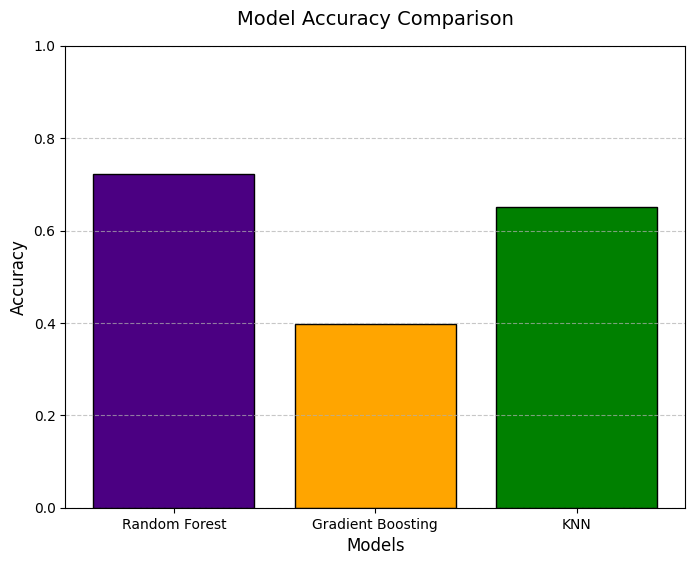

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the accuracies in a bar plot
plt.figure(figsize=(8, 6))
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.bar(model_names, accuracy_values, color=['indigo', 'orange', 'green'], edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=14, pad=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Random Forest Model's accuracy is better than other two model's

In [ ]:
import pickle
print("\nSaving Random Forest model to pickle file...")
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(models['Random Forest'], f)
print("Random Forest model saved as 'rf_model.pkl'")


Saving Random Forest model to pickle file...
Random Forest model saved as 'rf_model.pkl'
